<h1>1. Preparación de datos</h1>

In [20]:
# librerías
import numpy  as np  
import pandas as pd  
import warnings
warnings.filterwarnings('ignore')

# lectura csv
airbnb_data = pd.read_csv("./airbnb-listings-extract.csv",sep=';')
# "./data/airbnb-listings-extract.csv"

# filtramos por Madrid
airbnb_data = airbnb_data[airbnb_data['City'] == 'Madrid']

# dropeamos variables categóricas,excepto : 'Room Type','Property Type', 'Neighbourhood Group Cleansed' 
airbnb_data = airbnb_data.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 
                                'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit',
                                'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url',
                               'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
                                'Host About', 'Host Response Time', 'Has Availability', 'Host Acceptance Rate',
                               'Host Thumbnail Url', 'Host Picture Url', 'Host Verifications', 'Street', 'Neighbourhood',
                               'Country Code', 'Host Neighbourhood', 'Neighbourhood Cleansed','City',  
                                'State', 'Zipcode', 'Market','Smart Location', 'Country', 'Amenities', 'Calendar Updated',
                               'Calendar last Scraped', 'First Review', 'Last Review', 'Cancellation Policy', 'Bed Type', 
                           'Features', 'License','Jurisdiction Names', 'Geolocation'], axis = 1)

# reordenamos 'Price' a la primera columna
column_order = ['Price'] + airbnb_data.columns.difference(['Price']).tolist()
airbnb_data = airbnb_data[column_order]

In [21]:
# división train/test
from sklearn.model_selection import train_test_split

train, test = train_test_split(airbnb_data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv("./train.csv", sep=';', decimal='.', index=False)
test.to_csv("./test.csv" , sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 
df_train = pd.read_csv("./train.csv", sep=';', decimal='.')

Dimensiones del dataset de training: (10565, 36)
Dimensiones del dataset de test: (2642, 36)


<h1>2. Análisis exploratorio</h1>

In [22]:
df_train.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           10558 non-null  float64
 1   Accommodates                    10565 non-null  int64  
 2   Availability 30                 10565 non-null  int64  
 3   Availability 365                10565 non-null  int64  
 4   Availability 60                 10565 non-null  int64  
 5   Availability 90                 10565 non-null  int64  
 6   Bathrooms                       10523 non-null  float64
 7   Bedrooms                        10545 non-null  float64
 8   Beds                            10522 non-null  float64
 9   Calculated host listings count  10565 non-null  float64
 10  Cleaning Fee                    6256 non-null   float64
 11  Extra People                    10565 non-null  int64  
 12  Guests Included                 

In [23]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10558.0,65.771832,56.347456,9.000000,31.000000,52.000000,80.000000,875.000000
Accommodates,10565.0,3.182773,1.986991,1.000000,2.000000,2.000000,4.000000,16.000000
Availability 30,10565.0,8.741978,9.084841,0.000000,0.000000,6.000000,14.000000,30.000000
Availability 365,10565.0,204.721912,127.258563,0.000000,83.000000,245.000000,321.000000,365.000000
Availability 60,10565.0,22.928064,19.510154,0.000000,5.000000,20.000000,38.000000,60.000000
Availability 90,10565.0,40.119072,29.365182,0.000000,12.000000,38.000000,65.000000,90.000000
Bathrooms,10523.0,1.253587,0.603839,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10545.0,1.293789,0.832743,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,10522.0,1.981753,1.509860,1.000000,1.000000,1.000000,2.000000,16.000000
Calculated host listings count,10565.0,7.414671,18.860692,1.000000,1.000000,2.000000,4.000000,145.000000


In [24]:
# correlación de variables
df_train.corr()

,Price,Accommodates,Availability 30,Availability 365,Availability 60,Availability 90,Bathrooms,Bedrooms,Beds,Calculated host listings count,...,Review Scores Checkin,Review Scores Cleanliness,Review Scores Communication,Review Scores Location,Review Scores Rating,Review Scores Value,Reviews per Month,Security Deposit,Square Feet,Weekly Price
Price,1.000000,0.575062,0.017397,0.071092,0.003773,-0.013113,0.345112,0.519582,0.489003,0.151365,...,-0.009562,0.087223,0.001968,0.144894,0.057216,0.020938,-0.059967,0.369519,0.283518,0.833265
Accommodates,0.575062,1.000000,-0.067163,0.077336,-0.058821,-0.064222,0.317911,0.675677,0.822312,0.124925,...,-0.065877,-0.021237,-0.056564,0.042575,-0.066422,-0.061935,0.050762,0.171599,0.332945,0.584027
Availability 30,0.017397,-0.067163,1.000000,0.423912,0.920996,0.851788,-0.018280,-0.025169,-0.001306,-0.068342,...,-0.079359,-0.075661,-0.070919,-0.119146,-0.095109,-0.102843,-0.156624,-0.004629,-0.007156,-0.136233
Availability 365,0.071092,0.077336,0.423912,1.000000,0.491465,0.533871,-0.001305,0.021943,0.090722,0.075007,...,-0.068206,-0.033848,-0.072478,-0.060956,-0.081530,-0.096581,-0.049144,0.054339,-0.020377,0.019202
Availability 60,0.003773,-0.058821,0.920996,0.491465,1.000000,0.964550,-0.034847,-0.036948,-0.003130,-0.068428,...,-0.070372,-0.066106,-0.065442,-0.111567,-0.089099,-0.099098,-0.120092,-0.009711,-0.017969,-0.139798
Availability 90,-0.013113,-0.064222,0.851788,0.533871,0.964550,1.000000,-0.035590,-0.047138,-0.012166,-0.051097,...,-0.064514,-0.059587,-0.063093,-0.109356,-0.084907,-0.096107,-0.093710,-0.006046,-0.041898,-0.143631
Bathrooms,0.345112,0.317911,-0.018280,-0.001305,-0.034847,-0.035590,1.000000,0.419796,0.380313,0.179666,...,-0.041547,0.008212,-0.037366,0.036469,0.012926,0.003990,-0.060604,0.196467,0.382426,0.090006
Bedrooms,0.519582,0.675677,-0.025169,0.021943,-0.036948,-0.047138,0.419796,1.000000,0.692318,0.064178,...,-0.014504,0.009506,-0.002177,0.000701,0.012664,0.003412,-0.041612,0.204721,0.428393,0.364152
Beds,0.489003,0.822312,-0.001306,0.090722,-0.003130,-0.012166,0.380313,0.692318,1.000000,0.091414,...,-0.049497,-0.025985,-0.041606,0.005990,-0.055416,-0.052463,-0.008980,0.167398,0.332492,0.392717
Calculated host listings count,0.151365,0.124925,-0.068342,0.075007,-0.068428,-0.051097,0.179666,0.064178,0.091414,1.000000,...,-0.280916,-0.086110,-0.259324,-0.033171,-0.219975,-0.188043,-0.121734,0.028139,-0.060028,0.136163


In [25]:
# outliers : he mirado cada variable con 'value_counts'
column_values = df_train['Bathrooms'].value_counts()
print(column_values)

1.0    8063
2.0    1622
1.5     360
3.0     183
2.5      70
0.0      50
0.5      49
5.0      37
4.0      32
4.5      22
6.0      16
3.5      12
5.5       3
8.0       2
7.0       1
6.5       1
Name: Bathrooms, dtype: int64


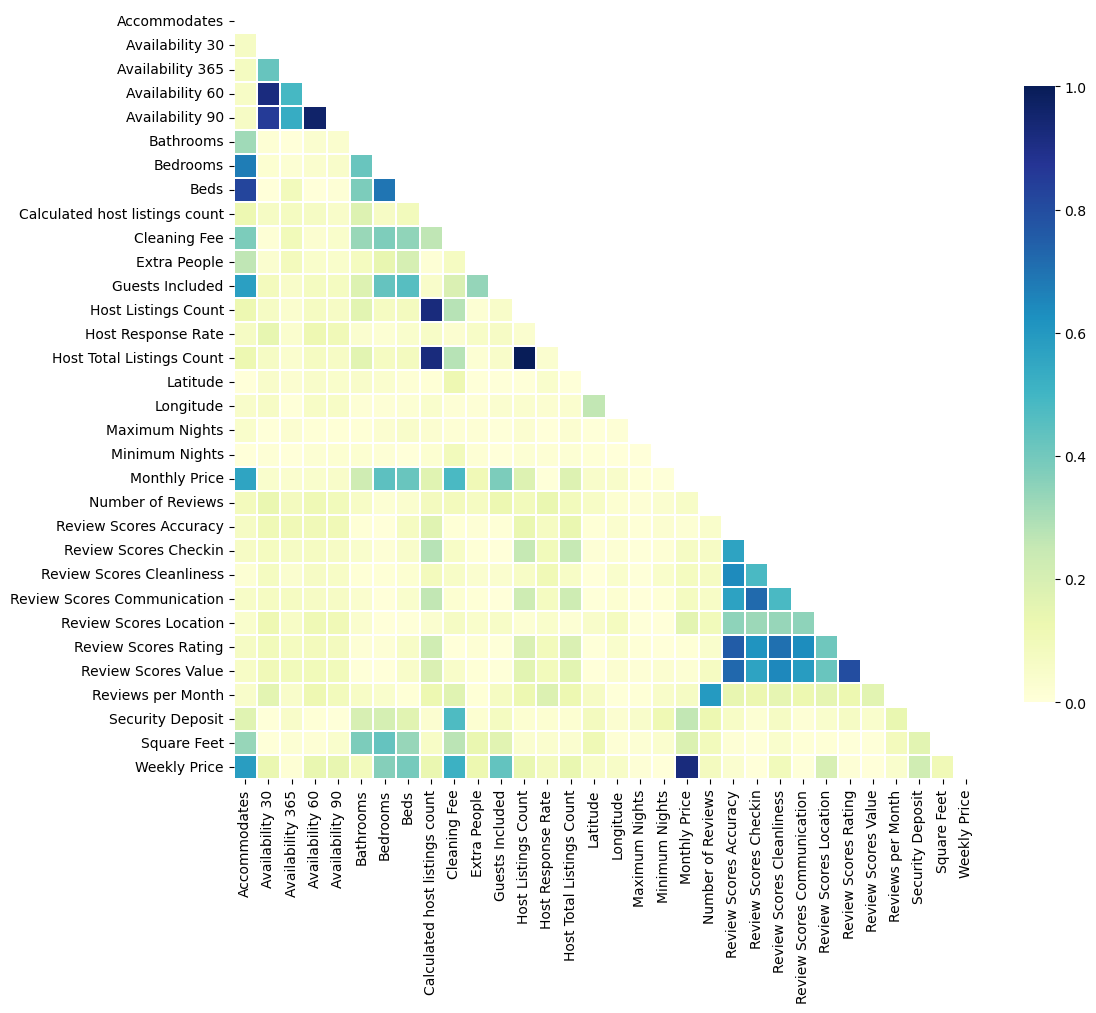

In [26]:
# mapa de correlación entre variables
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [27]:
# porcentaje de nulos
valores_nulos = df_train.isnull().sum()
total_filas = df_train.shape[0]

porcentaje_nulos = (valores_nulos / total_filas) * 100
porcentaje_nulos

Price                              0.066257
Accommodates                       0.000000
Availability 30                    0.000000
Availability 365                   0.000000
Availability 60                    0.000000
Availability 90                    0.000000
Bathrooms                          0.397539
Bedrooms                           0.189304
Beds                               0.407004
Calculated host listings count     0.000000
Cleaning Fee                      40.785613
Extra People                       0.000000
Guests Included                    0.000000
Host Listings Count                0.018930
Host Response Rate                12.683389
Host Total Listings Count          0.018930
Latitude                           0.000000
Longitude                          0.000000
Maximum Nights                     0.000000
Minimum Nights                     0.000000
Monthly Price                     75.068623
Neighbourhood Group Cleansed       0.000000
Number of Reviews               

<h1>3. Preprocesamiento </h1>

In [28]:
# Datos de Train

# dropeamos variables con gran porcentaje de nulos
df_train = df_train.drop(['Square Feet' , 'Weekly Price', 'Monthly Price'], axis = 1)

# dropeamos variables muy correlacionadas con 'Calculated host listings count'
df_train = df_train.drop(['Host Total Listings Count','Host Listings Count'], axis = 1) 

# dropeamos variable muy correlacionada con 'Availability 30', 'Availability 90', 'Availability 365'
df_train = df_train.drop(['Availability 60'], axis = 1) 

# he probado sin estas variables y mejora 'levemente' la predicción, a parte de tampoco las veo mucho sentido 
df_train = df_train.drop(['Maximum Nights', 'Minimum Nights'], axis = 1) 

# outliers mirados con 'value_counts'
df_train = df_train[df_train['Bathrooms'] < 7]
df_train = df_train[df_train['Bedrooms'] < 6]
df_train = df_train[df_train['Beds'] < 11]
df_train = df_train[df_train['Guests Included'] < 9]

# variables categóricas
from sklearn.preprocessing import LabelEncoder
  
label_encoder = LabelEncoder()
df_train['Room Type'] = label_encoder.fit_transform(df_train['Room Type'])
df_train['Property Type'] = label_encoder.fit_transform(df_train['Property Type'])
df_train['Neighbourhood Group Cleansed'] = label_encoder.fit_transform(df_train['Neighbourhood Group Cleansed'])

# Convertir las columnas de tipo object a int64
float_columns = df_train.select_dtypes(include=['object']).columns
df_train[float_columns] = df_train[float_columns].astype('int64')

# rellenamos valores faltantes con la moda
column_modes = df_train.mode().iloc[0]  
df_train = df_train.fillna(column_modes) 

# vamos a trabajar con un total de 28 variables
df_train.shape

# en este punto volví a mirar el mapa de correlación de variables para ver la correlación de las variables categóricas

(10443, 28)

In [29]:
# divsión datos de train
from sklearn import preprocessing
data = df_train.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df_train.columns[1:]

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

best mean cross-validation score: -1344.984
best parameters: {'alpha': 0.1}


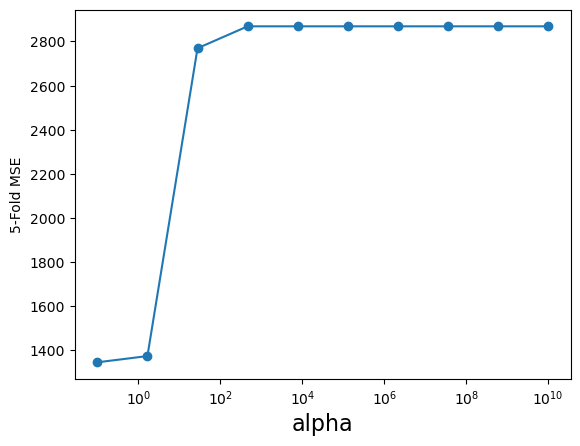

In [30]:
# seleccion de características y validación cruzada con Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,10)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
import matplotlib.pyplot as plt
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

# con ridge : 
    # best mean cross-validation score: -1345.633
    # best parameters: {'alpha': 27.825594022071257}

<h1>4. Modelado</h1>

In [31]:
# Datos de Test
df_test = pd.read_csv("./test.csv", sep=';', decimal='.')

# dropeamos variables con gran porcentaje de nulos
df_test = df_test.drop(['Square Feet' , 'Weekly Price', 'Monthly Price'], axis = 1)

# dropeamos variables muy correlacionadas con 'Calculated host listings count'
df_test = df_test.drop(['Host Total Listings Count','Host Listings Count'], axis = 1) 

# dropeamos variables muy correlacionadas con 'Availability 30', 'Availability 90', 'Availability 365'
df_test = df_test.drop(['Availability 60'], axis = 1) 

# he probado sin estas variables y mejora 'levemente' la predicción 
df_test = df_test.drop(['Maximum Nights', 'Minimum Nights'], axis = 1)

# outliers
df_test = df_test[df_test['Bathrooms'] < 7]
df_test = df_test[df_test['Bedrooms'] < 6]
df_test = df_test[df_test['Beds'] < 11]
df_test = df_test[df_test['Guests Included'] < 9]

# variables categóricas
from sklearn.preprocessing import LabelEncoder

df_test['Room Type'] = label_encoder.fit_transform(df_test['Room Type'])
df_test['Property Type'] = label_encoder.fit_transform(df_test['Property Type'])
df_test['Neighbourhood Group Cleansed'] = label_encoder.fit_transform(df_test['Neighbourhood Group Cleansed'])

# rellenamos valores faltantes con la moda
column_modes = df_test.mode().iloc[0]  # Calcula la moda de cada columna
df_test = df_test.fillna(column_modes)  # Rellena los valores nulos con las modas 

# Convertir las columnas de tipo object a int64
float_columns = df_test.select_dtypes(include=['object']).columns
df_test[float_columns] = df_test[float_columns].astype('int64')

In [32]:
# divsión datos de test
data_test = df_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test)

In [33]:
# ajustamos los datos a Lasso y hacemos predicción
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso = lasso.predict(XtestScaled)

mseTrainModelLasso = mean_squared_error(y_train, ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test, ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Ridge (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)
    
# predicción con Lasso
y_pred = lasso.predict(XtestScaled)

MSE Modelo Lasso (train): 1.33e+03
MSE Modelo Lasso (test) : 1.13e+03
RMSE Modelo Lasso (train): 36.5
RMSE Modelo Ridge (test) : 33.7
Accommodates 10.376370097850312
Availability 30 6.744600660857206
Availability 365 0.0
Availability 90 -0.7472374435576764
Bathrooms 7.19556299887284
Bedrooms 7.161320537137204
Beds 0.6269981602687977
Calculated host listings count -0.0
Cleaning Fee 15.28750619734677
Extra People -2.5615924497901714
Guests Included 1.9525375775840987
Host Response Rate -0.27072248786526415
Latitude 0.9850961617533269
Longitude 0.10427969431967424
Neighbourhood Group Cleansed -1.6590383024007935
Number of Reviews -0.5296418463365531
Property Type -0.0
Review Scores Accuracy 1.1172367884078642
Review Scores Checkin -0.0
Review Scores Cleanliness 0.9945092277852123
Review Scores Communication -1.9781419467549186
Review Scores Location 3.441968770071161
Review Scores Rating 3.074594995745398
Review Scores Value -0.32320652401072986
Reviews per Month -2.3423228253503634
Room 

In [34]:
# métricas regresión lineal con Lasso

# media de las diferencias entre las predicciones y los valores reales
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# media de los errores al cuadrado entre las predicciones y los valores reales
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# proporción de la varianza en la variable dependiente que se puede predecir a partir de las variables independientes
from sklearn.metrics import r2_score

# calcular R2 para el conjunto de entrenamiento
y_train_pred = lasso.predict(XtrainScaled)
r2_train = r2_score(y_train, y_train_pred)

# calcular R2 para el conjunto de prueba
r2_test = r2_score(y_test, y_pred)

print("R2 de train:", r2_train)
print("R2 de test:", r2_test)

# calcula el RMSE 
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# con ridge : 
    # MAE: 19.224263452119256
    # MSE: 1134.297660356496
    # R2 de train: 0.5357043280990588
    # R2 de test: 0.5760933674450855
    # RMSE: 33.67933580634416

MAE: 19.18030157932196
MSE: 1134.0264402235382
R2 de train: 0.5355427461638242
R2 de test: 0.576194727094551
RMSE: 33.675309059064894


In [35]:
# vamos a probar con los algoritmos basados en árboles
!pip install xgboost
!pip install lightgbm

In [36]:
# predicción con lightgbm

# tarda 10 segundos en ejecutarse 
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': range(1, 10),
    'n_estimators': [100, 200],  
    'learning_rate': [0.1, 0.01]
}

# validación cruzada
grid = GridSearchCV(lgb.LGBMRegressor(random_state=0), param_grid=params, cv=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# predicción
best_model = grid.best_estimator_
y_pred = best_model.predict(XtestScaled)

# predicción con xgboost :
    # best mean cross-validation score: 0.623
    # best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
    
# predicción con random forest :
    # best mean cross-validation score: 0.120
    # best parameters: {'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 200}

best mean cross-validation score: 0.631
best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [37]:
# métricas con lightgbm

# media de las diferencias entre las predicciones y los valores reales
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# media de los errores al cuadrado entre las predicciones y los valores reales
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# proporción de la varianza en la variable dependiente que se puede predecir a partir de las variables independientes
from sklearn.metrics import r2_score

# calcular R2 para el conjunto de entrenamiento
y_train_pred = best_model.predict(XtrainScaled)
r2_train = r2_score(y_train, y_train_pred)

# calcular R2 para el conjunto de prueba
r2_test = r2_score(y_test, y_pred)

print("R2 de train:", r2_train)
print("R2 de test:", r2_test)

# calcula el RMSE 
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# con xgboost:

# MAE: 14.70691262781848
# MSE: 778.9176775828382
# R2 de train: 0.790933805403537
# R2 de test: 0.7089050067881993
# RMSE: 27.909096681598964

# con random forest : 

# MAE: 17.700841622035195
# MSE: 1310.6855394032134
# R2 de train: 0.6459995827494747
# R2 de test: 0.5101741696511859
# RMSE: 36.2033912693716

MAE: 14.549439721645994
MSE: 780.280830455276
R2 de train: 0.7963781394178359
R2 de test: 0.708395573009035
RMSE: 27.933507306732466


<h1>5. Conclusiónes </h1>

In [19]:
# Con algoritmos basados en árboles hace mejores predicciones que con Regresión Lineal

# Mejora leve usando Lasso o Ridge en regresión lineal, y, entre ellos, no difieren mucho los resultados

# Me he dado cuenta que ha mejorado la predición más con la moda que con la media

# Peores resultados con random forest que con lightgbm y xgboost, a parte de que tarda más en ejecutarse

# Resultados similares entre lightgbm y xgboost,xgboost tarda más en ejecutarse